# Data exploration

## Global settings

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
DATA_PATH = "2010to2017nsWithoutNA.csv"

In [156]:
def plot_anomalies(feature, ax):
    data_normal.plot.scatter(x='id', y=feature, s=4, c='green', figsize=(16, 9), alpha=0.5, ax=ax, label='Normal')
    data_abnormal.plot.scatter(x='id', y=feature, s=4, c='red', alpha=0.5, ax=ax, label='Abnormal')
    return ax
    
def plot_corr(feature1, feature2, ax):
    data_normal.plot.scatter(x=feature1, y=feature2, s=4, c='Green', figsize=(8, 8), alpha=0.5, ax=ax, label='Normal')
    data_abnormal.plot.scatter(x=feature1, y=feature2, s=4, c='red', alpha=0.5, ax=ax, label='Abnormal')
    return ax

## Data exploration

In [171]:
# Load data
data = pd.read_csv(DATA_PATH)

In [172]:
# Add id 
data['id'] = range(len(data))

In [173]:
data.head()

,time,Longitude,Latitude,botDepth,date,depth,temperature,salinity,qualityflag,id
0,15.0,9.65706,53.57080,12.0,20100121.0,3.0,0.0005,33.658676,0.0,0
1,15.0,9.65226,53.57170,11.0,20100121.0,3.0,0.0026,33.658894,0.0,1
2,15.0,9.64802,53.57256,13.0,20100121.0,3.0,0.0015,33.658823,0.0,2
3,15.0,9.64354,53.57392,12.0,20100121.0,3.0,0.0018,33.658896,0.0,3
4,15.0,9.63918,53.57548,13.0,20100121.0,3.0,0.0010,33.658877,0.0,4


In [116]:
## Separate normal and abnormal data
data_normal = data.loc[data.qualityflag == 0]
data_abnormal = data.loc[data.qualityflag == 1]

In [174]:
len(data)

220612

In [117]:
## Omit extreme data point
data_abnormal = data_abnormal.loc[data.temperature > -50]

In [51]:
data_abnormal.head()

,time,Longitude,Latitude,botDepth,date,depth,temperature,salinity,qualityflag,id
110465,0.0,356.43378,49.50800,0.0,20110131.0,2.0,14.687000,35.441002,1.0,110465
110482,3.0,356.93826,49.71847,0.0,20110131.0,2.0,15.008000,35.444000,1.0,110482
110485,3.0,357.03925,49.76048,0.0,20110131.0,2.0,14.904000,35.854000,1.0,110485
115017,14.0,358.03293,49.40532,0.0,20130223.0,2.0,19.080999,34.983749,1.0,115017
124288,20.0,2.43600,51.32580,0.0,20100114.0,3.5,5.834000,34.483002,1.0,124288


In [170]:
len(data_abnormal) / len(data_normal) * 100

0.6992911232934238

In [168]:
0.7% 

219079

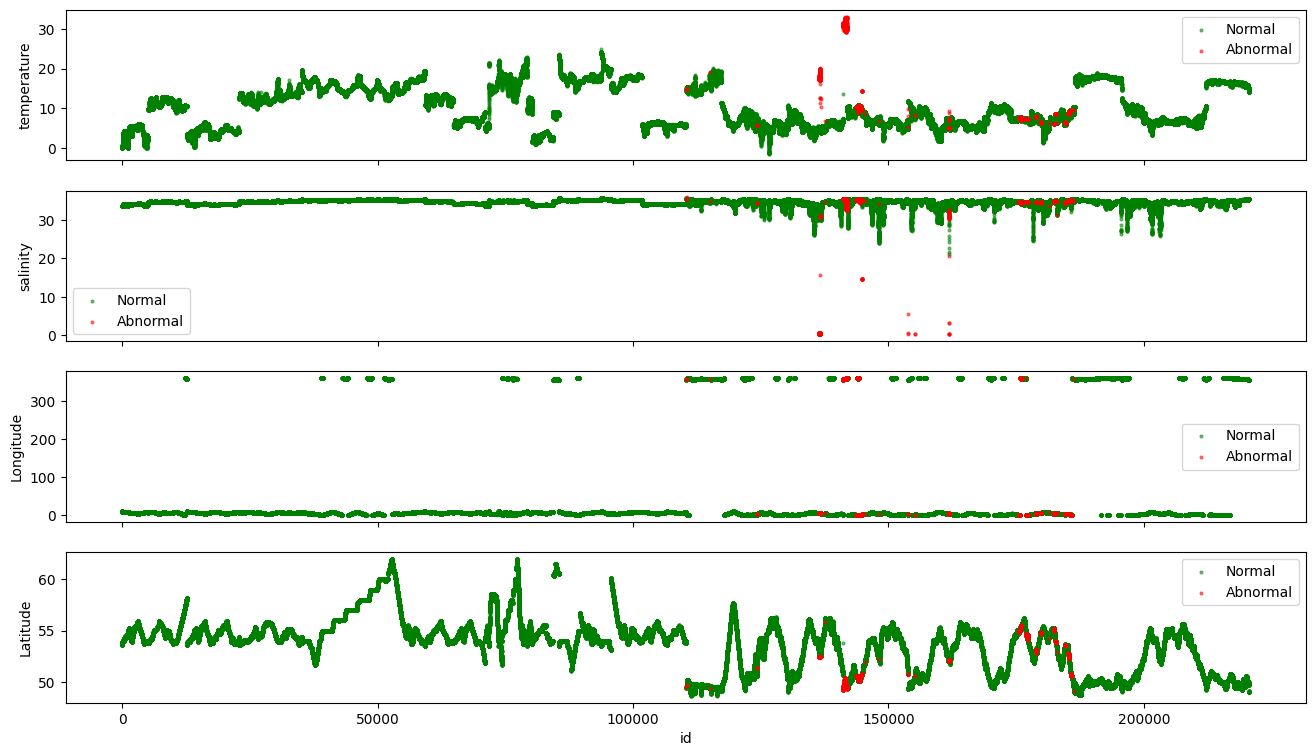

In [154]:
# Plot data in each dimension
features = ['temperature', 'salinity', 'Longitude', 'Latitude']
fig, axs = plt.subplots(len(features), 1, sharex=True, )
for i, feature in enumerate(features): 
    ax = plot_anomalies(feature, axs[i])
    # ax.get_legend().remove()

# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center')

<AxesSubplot: xlabel='id', ylabel='date'>

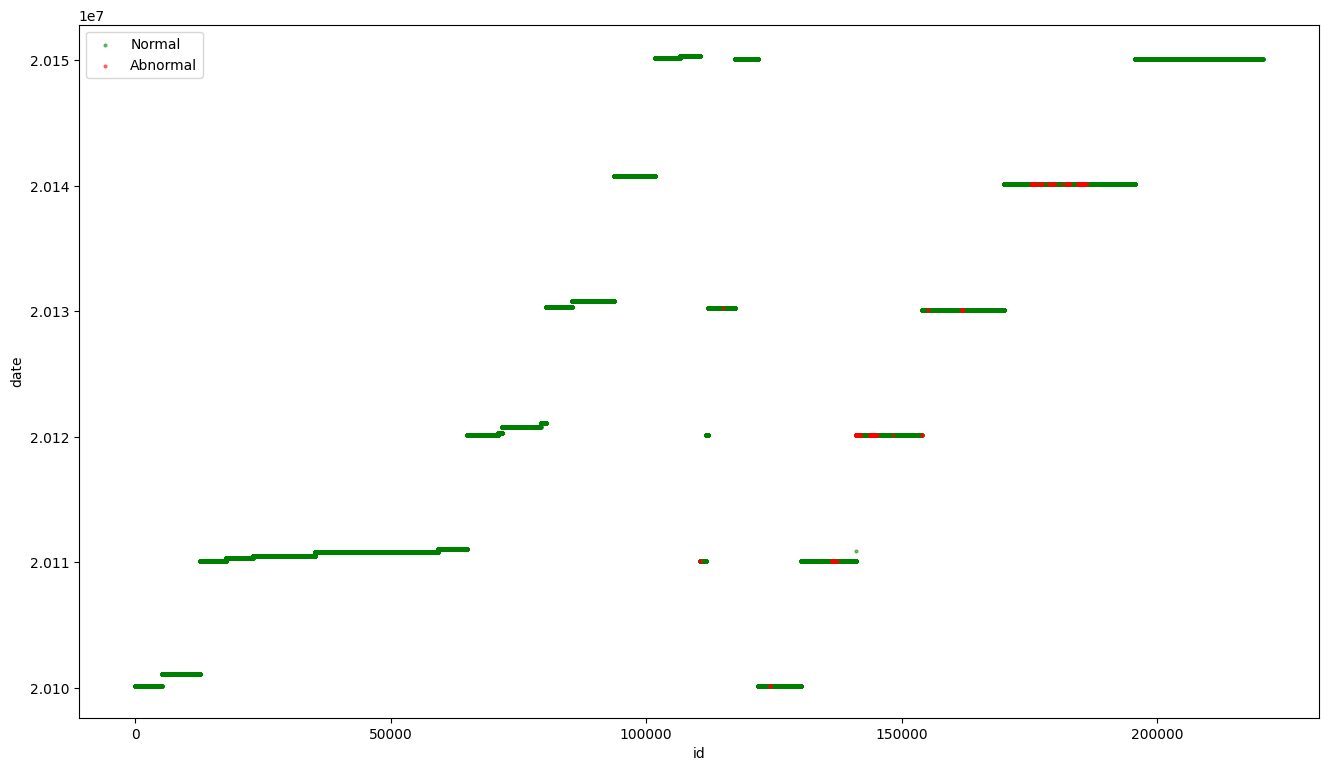

In [161]:
fig, ax = plt.subplots()
plot_anomalies('date', ax)

In [155]:
# Save the figure
fig.savefig('one_dimension.png', bbox_inches='tight')

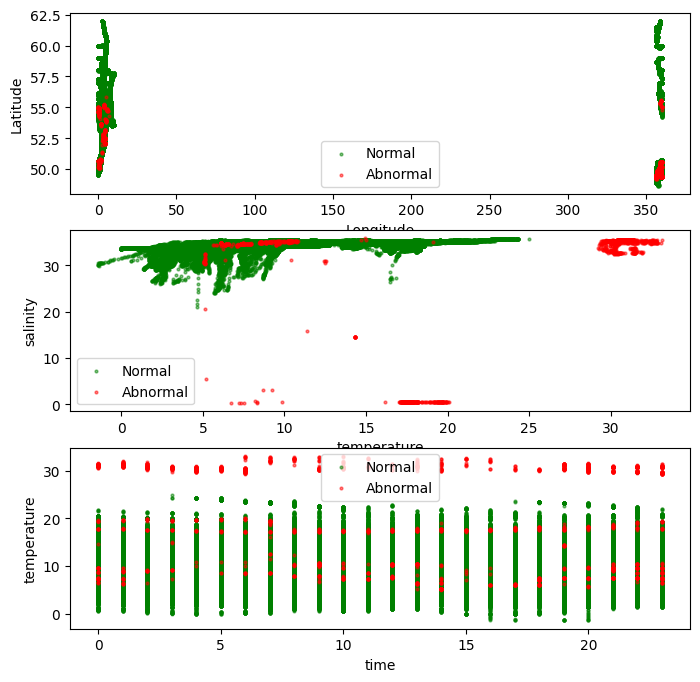

In [162]:
# Plot Longitude and Latitude, temperature and salinity
features = [('Longitude', 'Latitude'), ('temperature', 'salinity'), ('time', 'temperature')]
fig, axs = plt.subplots(len(features), 1)
for i, feature in enumerate(features): 
    ax = plot_corr(feature[0], feature[1], axs[i])

In [160]:
# Save the figure
fig.savefig('two_dimensions.png', bbox_inches='tight')

<AxesSubplot: xlabel='id', ylabel='time'>

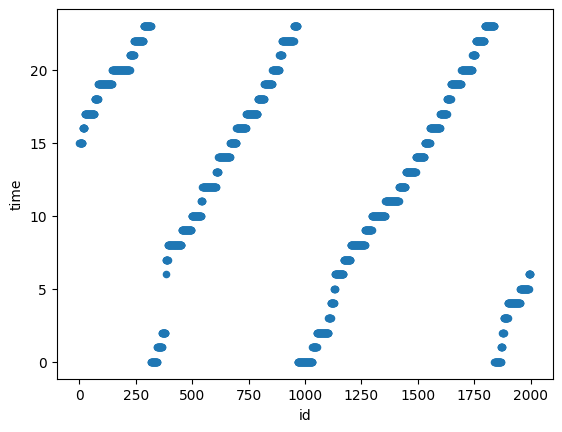

In [33]:
# Plot time
data.iloc[:2000].plot.scatter(x='id', y='time')

,time,Longitude,Latitude,botDepth,date,depth,temperature,salinity,qualityflag,id
0,15.0,9.65706,53.57080,12.0,20100121.0,3.0,0.0005,33.658676,0.0,0
1,15.0,9.65226,53.57170,11.0,20100121.0,3.0,0.0026,33.658894,0.0,1
2,15.0,9.64802,53.57256,13.0,20100121.0,3.0,0.0015,33.658823,0.0,2
3,15.0,9.64354,53.57392,12.0,20100121.0,3.0,0.0018,33.658896,0.0,3
4,15.0,9.63918,53.57548,13.0,20100121.0,3.0,0.0010,33.658877,0.0,4
...,...,...,...,...,...,...,...,...,...,...
220607,7.0,355.97763,49.09174,0.0,20150111.0,3.5,14.0350,35.358181,0.0,220607
220608,7.0,355.97485,49.09552,0.0,20150111.0,3.5,14.0310,35.358089,0.0,220608
220609,7.0,355.97018,49.10169,0.0,20150111.0,3.5,14.0280,35.356300,0.0,220609
220610,7.0,355.96609,49.10715,0.0,20150111.0,3.5,14.0340,35.356022,0.0,220610
